# Loan Application Status Prediction

Problem Statement:

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

In [1]:
#Libraries for EDA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading my dataset
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
#first 5 records
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
#printing column names
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
#info of my columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
#checking null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
#dropping Loan ID as its a nominal data
df.drop("Loan_ID",axis=1,inplace=True)

In [9]:
#Filling null values
df["Gender"].fillna('Male',inplace=True)
df["Married"].fillna('Yes',inplace=True)
df["Dependents"].fillna(0,inplace=True)
df["Self_Employed"].fillna('No',inplace=True)
df['LoanAmount'].fillna(146.4,inplace=True)
df['Loan_Amount_Term'].fillna(360.0,inplace=True)
df['Credit_History'].fillna(1.0,inplace=True)

In [10]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
df.shape

(614, 12)

In [12]:
#Looping my object coulmns and printing all my nunique values
for column in df.columns:
    if df[column].dtype == object:
        print(str(column) + ' : ' +str(df[column].nunique()))
        print(df[column].value_counts())
        print('_______________________________________________')

Gender : 2
Male      502
Female    112
Name: Gender, dtype: int64
_______________________________________________
Married : 2
Yes    401
No     213
Name: Married, dtype: int64
_______________________________________________
Dependents : 5
0     345
1     102
2     101
3+     51
0      15
Name: Dependents, dtype: int64
_______________________________________________
Education : 2
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
_______________________________________________
Self_Employed : 2
No     532
Yes     82
Name: Self_Employed, dtype: int64
_______________________________________________
Property_Area : 3
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
_______________________________________________
Loan_Status : 2
Y    422
N    192
Name: Loan_Status, dtype: int64
_______________________________________________


In [13]:
#Looping my float coulmns and printing all my nunique values
for column in df.columns:
    if df[column].dtype == float:
        print(str(column) + ' : ' +str(df[column].nunique()))
        print(df[column].value_counts())
        print('_______________________________________________')

CoapplicantIncome : 287
0.0       273
2500.0      5
2083.0      5
1666.0      5
1625.0      3
         ... 
2365.0      1
1695.0      1
2466.0      1
2375.0      1
1700.0      1
Name: CoapplicantIncome, Length: 287, dtype: int64
_______________________________________________
LoanAmount : 204
146.4    22
120.0    20
110.0    17
100.0    15
160.0    12
         ..
211.0     1
250.0     1
62.0      1
85.0      1
436.0     1
Name: LoanAmount, Length: 204, dtype: int64
_______________________________________________
Loan_Amount_Term : 10
360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64
_______________________________________________
Credit_History : 2
1.0    525
0.0     89
Name: Credit_History, dtype: int64
_______________________________________________


In [14]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.411726,342.410423,0.855049
std,6109.041673,2926.248369,84.037468,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [15]:
# label encoding
df.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [16]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.4,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [17]:
# replacing the value of 3+ to 4
df = df.replace(to_replace='3+', value=4)

<AxesSubplot:xlabel='Education', ylabel='count'>

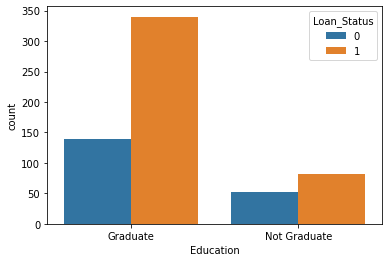

In [18]:
# education & Loan Status
sns.countplot(x='Education',hue='Loan_Status',data=df)

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

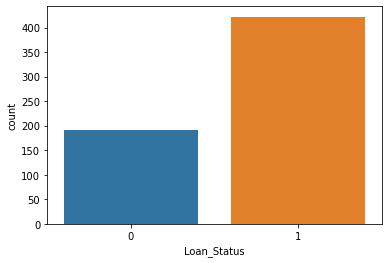

In [19]:
# education & Loan Status
sns.countplot(x='Loan_Status',data=df)

<AxesSubplot:xlabel='Married', ylabel='count'>

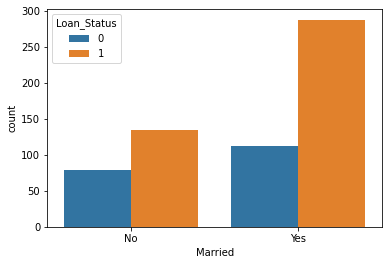

In [20]:
# education & Loan Status
sns.countplot(x='Married',hue='Loan_Status',data=df)

ApplicantIncome         AxesSubplot(0.125,0.657941;0.227941x0.222059)
CoapplicantIncome    AxesSubplot(0.398529,0.657941;0.227941x0.222059)
LoanAmount           AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Loan_Amount_Term        AxesSubplot(0.125,0.391471;0.227941x0.222059)
Credit_History       AxesSubplot(0.398529,0.391471;0.227941x0.222059)
Loan_Status          AxesSubplot(0.672059,0.391471;0.227941x0.222059)
dtype: object

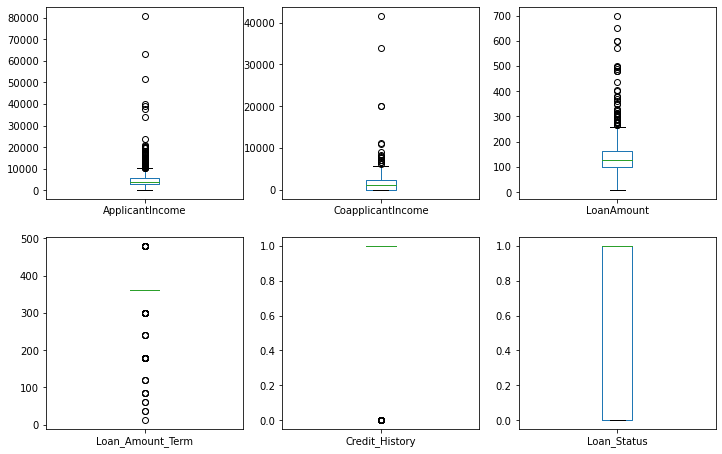

In [21]:
#boxplot to remove outliers
df.plot(kind='box', figsize=(12,12), layout=(3,3), sharex=False, subplots=True)

In [22]:
# convert categorical columns to numerical values
df.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,146.4,360.0,1.0,2,1
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1


In [23]:
df = df.astype({ "Dependents":'int64'})

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB


In [25]:
#Removing Outliers
from scipy import stats

z = np.abs(stats.zscore(df))
index = (np.where(z > 3)[0])

df = df.drop(df.index[index])

In [26]:
df.shape

(577, 12)

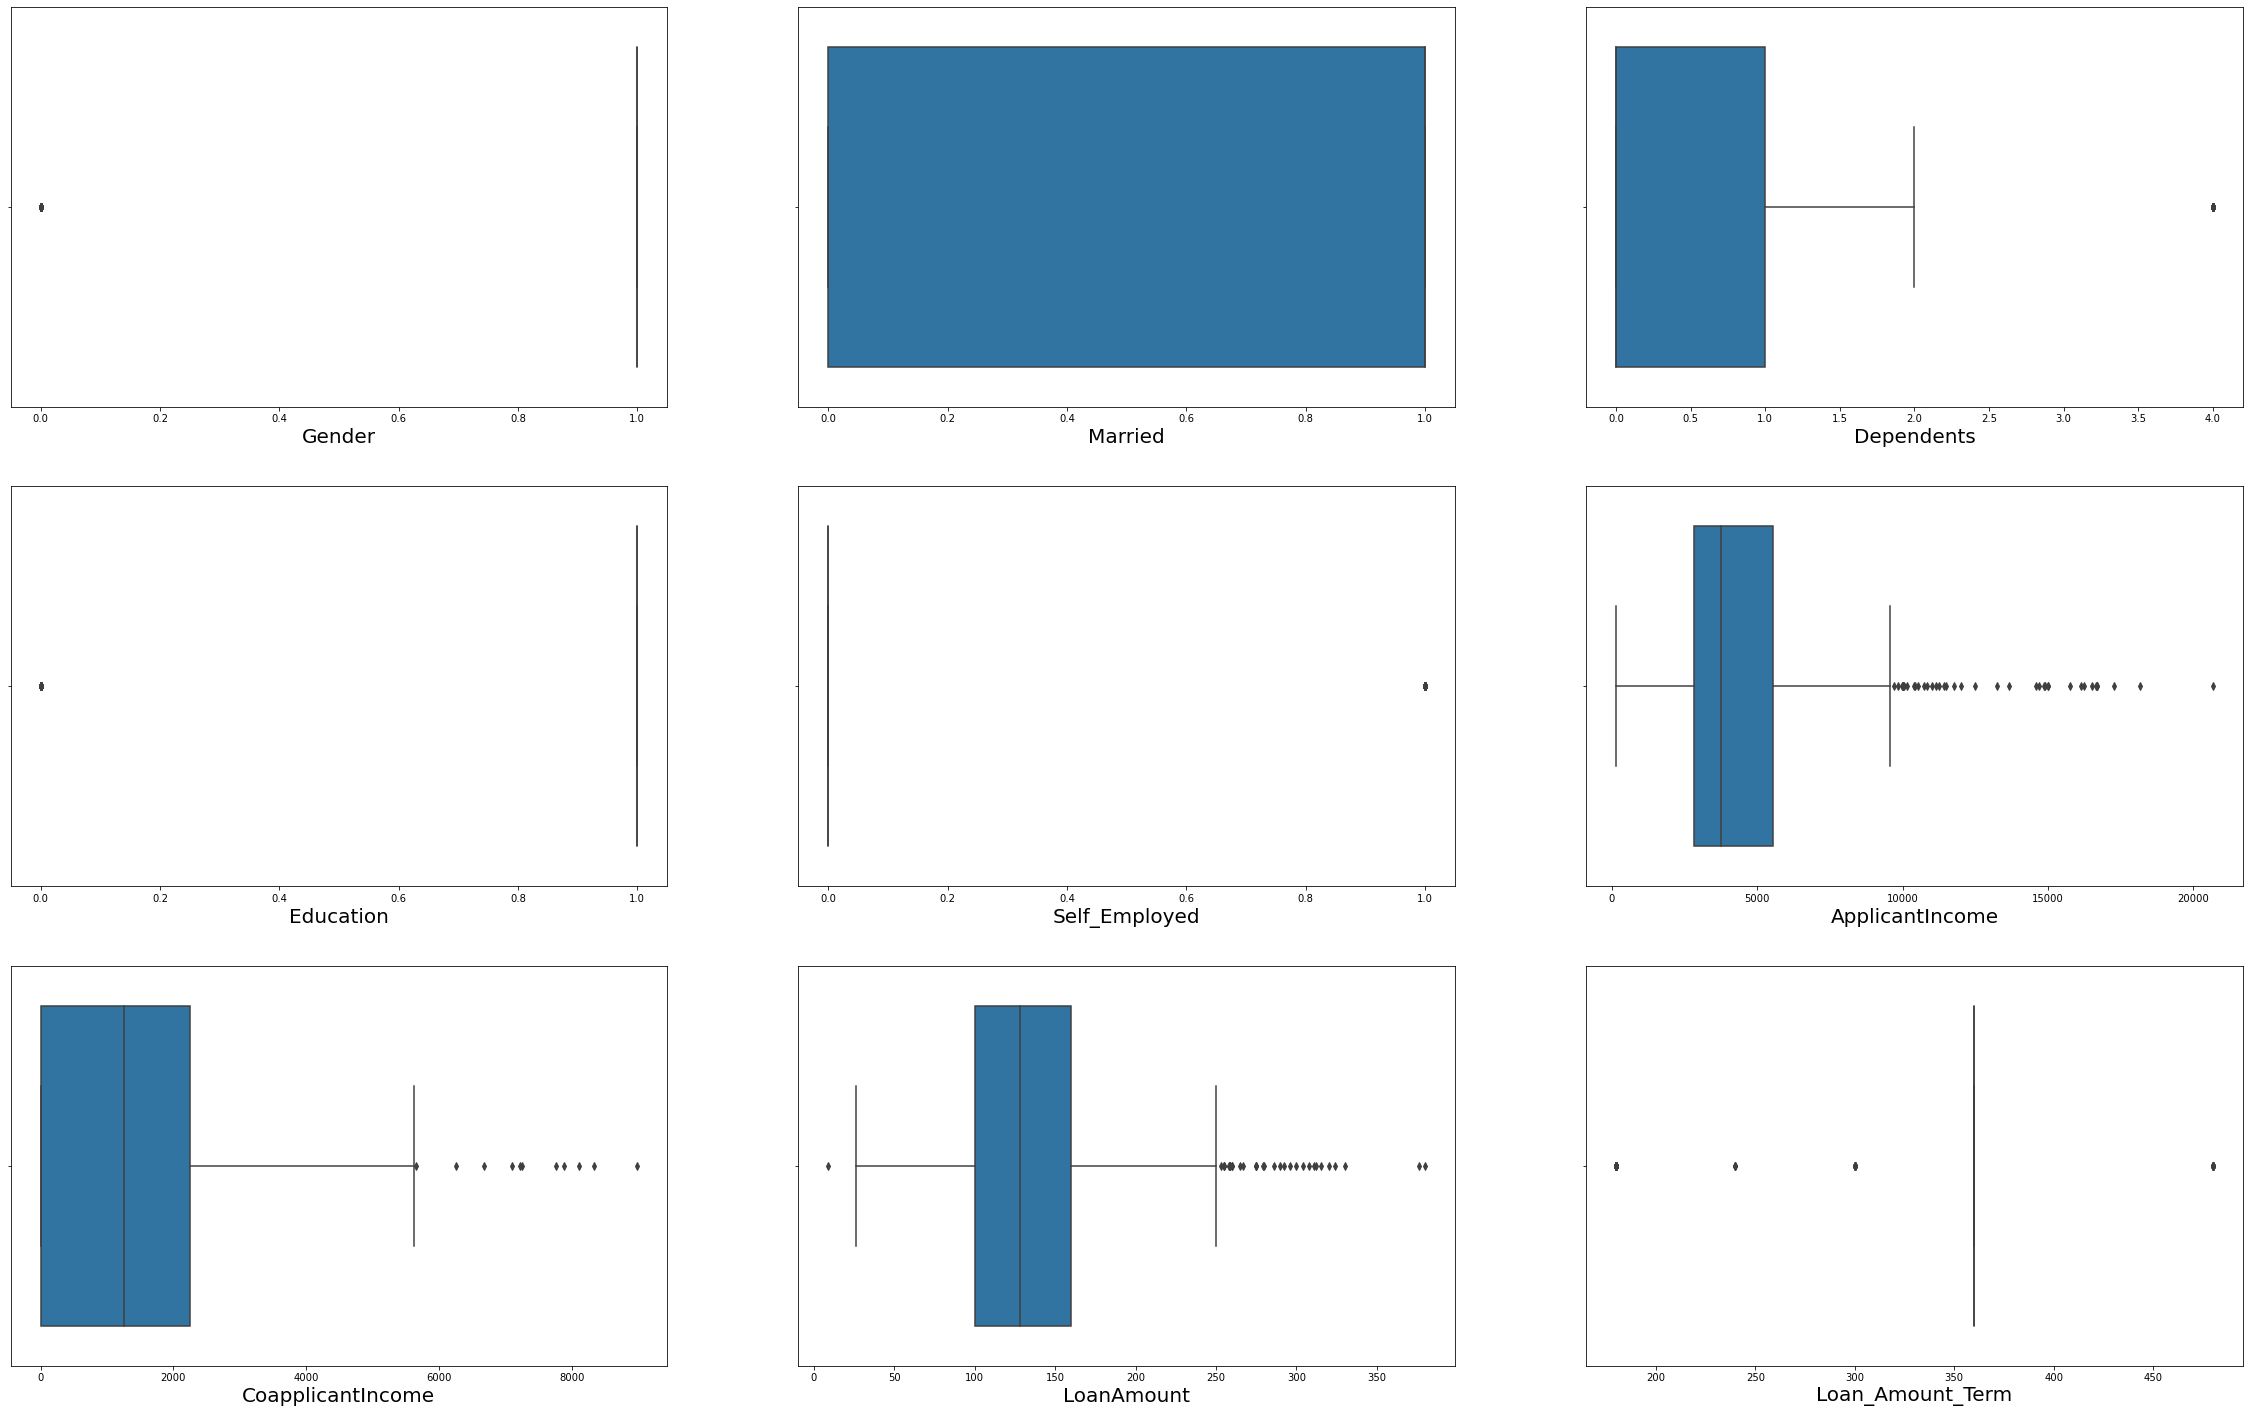

In [27]:
#plotting box plot for my dataframe removing outliers
plt.figure(figsize=(40,25),facecolor="white")
plotnumber = 1

for column in df:
    
    if(df[column].dtype == np.float64 or df[column].dtype == np.int64):
        if plotnumber<=9:
            ax = plt.subplot(3,3,plotnumber)
            sns.boxplot(df[column])
            plt.xlabel(column,fontsize=20)
       
    plotnumber +=1
plt.show()

In [28]:
#just to check correlation of the data between features
corr_mat = df.corr()

<function matplotlib.pyplot.show(close=None, block=None)>

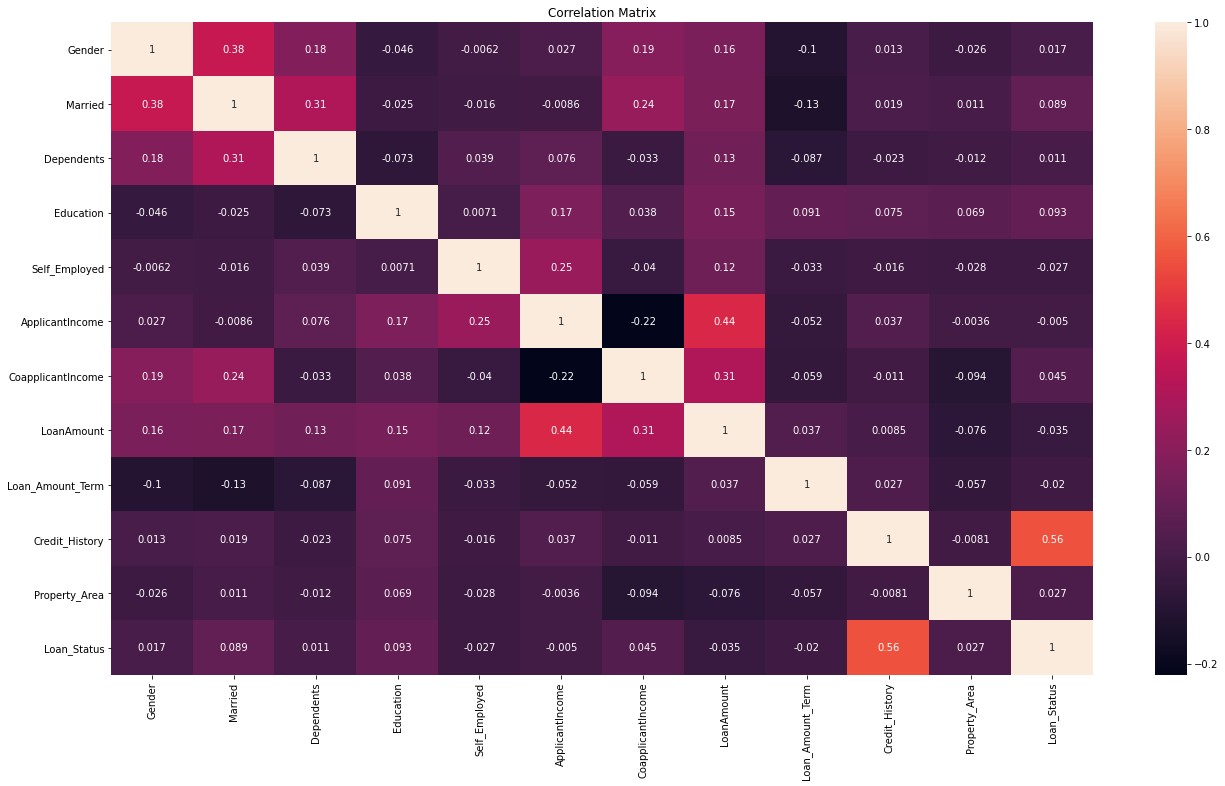

In [29]:
#Visualising heatmap for corr_mat and concluded that  all our features are not corelated
plt.figure(figsize=(22,12),facecolor="white")
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show

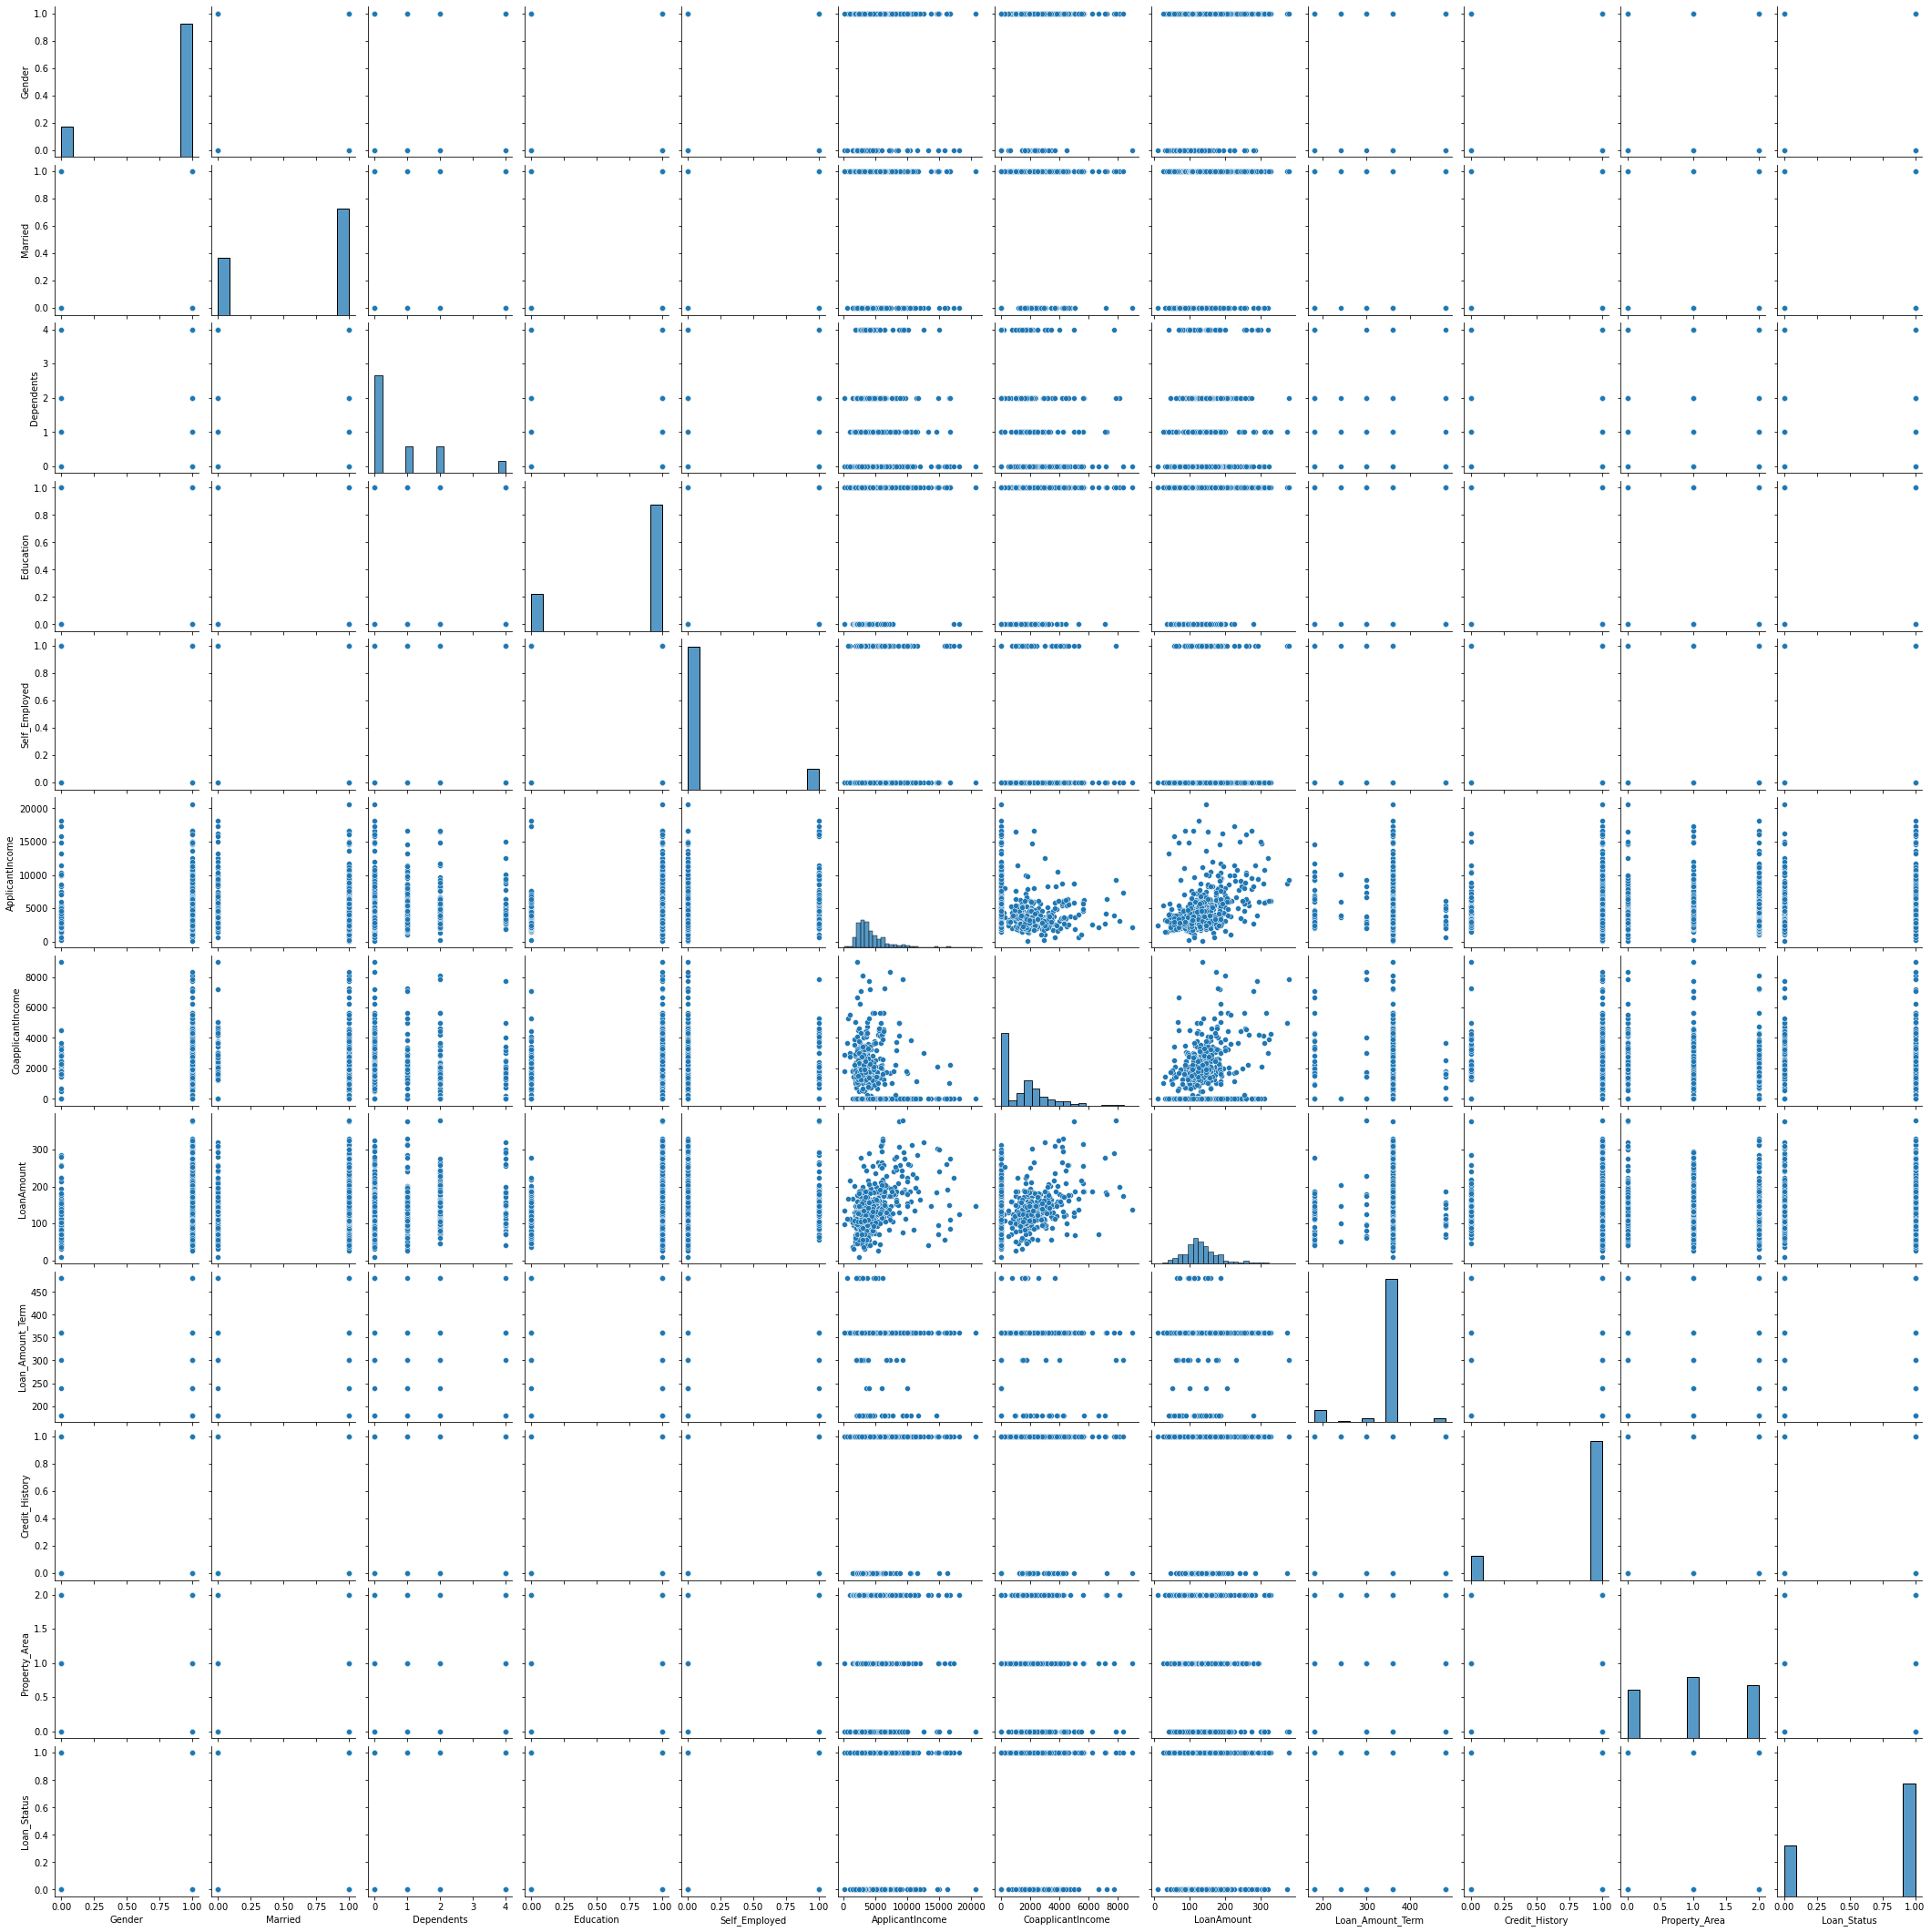

In [30]:
sns.pairplot(df)

In [31]:
# separating the data and label
X = df.drop(columns=['Loan_Status'],axis=1)
Y = df['Loan_Status']

In [32]:
#scaling mydata
from sklearn.preprocessing import StandardScaler
ss= StandardScaler().fit_transform(X)

In [33]:
#checking for is there any VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = ss
# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = X.columns

In [34]:
vif

,VIF,Features
0,1.205670,Gender
1,1.322249,Married
2,1.154220,Dependents
3,1.072622,Education
4,1.071845,Self_Employed
5,1.630850,ApplicantIncome
6,1.453296,CoapplicantIncome
7,1.661289,LoanAmount
8,1.059750,Loan_Amount_Term
9,1.009479,Credit_History


In [35]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
X_train, X_test,Y_train,Y_test = train_test_split(ss,Y,test_size=0.25,stratify=Y,random_state=2)

In [36]:
print(X.shape, X_train.shape, X_test.shape)

(577, 11) (432, 11) (145, 11)


In [37]:
#builiding SVM classifier and metrics to be validate my KNN
from sklearn import svm
SVM = svm.SVC()  #Instantiate KNN with k=3
SVM.fit(X_train,Y_train) #Call the fit method of KNN to train the model or to learn the parameters of model
Y_predict = SVM.predict(X_test) #Predict 
print('\033[1m''->'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(Y_test,Y_predict)) #for confusion matrix
print('-'*30)
SVM_accuracy = accuracy_score(Y_test,Y_predict)
print('Accuracy of SVM :{:.2f}'.format(SVM_accuracy)) #for accuracy score
print('-'*30)
print('\n Classification Report\n',classification_report(Y_test,Y_predict)) #for classification report
print('->'*63)

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
Confusion Matrix
 [[21 24]
 [ 4 96]]
------------------------------
Accuracy of SVM :0.81
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.84      0.47      0.60        45
           1       0.80      0.96      0.87       100

    accuracy                           0.81       145
   macro avg       0.82      0.71      0.74       145
weighted avg       0.81      0.81      0.79       145

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->


In [38]:
#for cross Validation
from sklearn.model_selection import KFold,cross_val_score
#Cross Validation  for SVC
a =cross_val_score(SVM,ss,Y,cv=5).mean()
b = SVM_accuracy

b-a

-0.005982008995502164

In [39]:
#linear regreession model build
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

model = lr.fit(X_train, Y_train)
y_pred = model.predict(X_test)

#Metrics for my model
print('\033[1m''->'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(Y_test,y_pred)) #for confusion matrix
print('-'*40)
LR_accuracy = accuracy_score(Y_test,y_pred)
print('Accuracy of Logistic Regression :{:.2f}'.format(LR_accuracy)) #for accuracy score
print('-'*40)
print('\n Classification Report\n',classification_report(Y_test,y_pred)) #for classification report
print('->'*63)

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
Confusion Matrix
 [[21 24]
 [ 4 96]]
----------------------------------------
Accuracy of Logistic Regression :0.81
----------------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.84      0.47      0.60        45
           1       0.80      0.96      0.87       100

    accuracy                           0.81       145
   macro avg       0.82      0.71      0.74       145
weighted avg       0.81      0.81      0.79       145

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->


In [40]:
#for cross Validation
from sklearn.model_selection import KFold,cross_val_score
#Cross Validation  for LR
a =cross_val_score(lr,ss,Y,cv=5).mean()
b = LR_accuracy

b-a

-0.009445277361319393

In [41]:
#builiding KNN classifier and metrics to be validate my KNN
from sklearn.neighbors import KNeighborsClassifier
# k=3
knn = KNeighborsClassifier(n_neighbors = 3)  #Instantiate KNN with k=3
knn.fit(X_train,Y_train) #Call the fit method of KNN to train the model or to learn the parameters of model
y_predict = knn.predict(X_test) #Predict 

print('\033[1m''->'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(Y_test,y_predict)) #for confusion matrix
print('-'*30)
KNN_accuracy = accuracy_score(Y_test,y_predict)
print('Accuracy of KNN :{:.2f}'.format(KNN_accuracy)) #for accuracy score
print('-'*30)
print('\n Classification Report\n',classification_report(Y_test,y_predict)) #for classification report
print('->'*63)

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
Confusion Matrix
 [[21 24]
 [ 7 93]]
------------------------------
Accuracy of KNN :0.79
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.75      0.47      0.58        45
           1       0.79      0.93      0.86       100

    accuracy                           0.79       145
   macro avg       0.77      0.70      0.72       145
weighted avg       0.78      0.79      0.77       145

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->


In [42]:
#for cross Validation
from sklearn.model_selection import KFold,cross_val_score
#Cross Validation  for KNN
a =cross_val_score(knn,ss,Y,cv=5).mean()
b = KNN_accuracy

b-a

0.014992503748125996

In [43]:
#Bulding RF and metrics to be validated
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()  #Instantiate RF
rf.fit(X_train,Y_train) #Call the fit method of RF to train the model or to learn the parameters of model
predicted_rf = rf.predict(X_test) #Predict 

print('\033[1m''->'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(Y_test,predicted_rf)) #for confusion matrix
print('-'*30)
rf_accuracy = accuracy_score(Y_test,predicted_rf) #for accuracy score
print('Accuracy of rf :',rf_accuracy)
print('-'*30)
print('\n Classification Report\n',classification_report(Y_test,predicted_rf)) #for classification report
print('->'*63)

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
Confusion Matrix
 [[23 22]
 [ 8 92]]
------------------------------
Accuracy of rf : 0.7931034482758621
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.74      0.51      0.61        45
           1       0.81      0.92      0.86       100

    accuracy                           0.79       145
   macro avg       0.77      0.72      0.73       145
weighted avg       0.79      0.79      0.78       145

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->


In [44]:
#for cross Validation
from sklearn.model_selection import KFold,cross_val_score
#Cross Validation  for RF
a =cross_val_score(rf,ss,Y,cv=5).mean()
b = rf_accuracy

b-a

-0.002428785607196504

In [45]:
#Bulding AB and metrics to be validated
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier()  #Instantiate AB
ab.fit(X_train,Y_train) #Call the fit method of AB to train the model or to learn the parameters of model
predicted_ab = ab.predict(X_test) #Predict 

print('\033[1m''->'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(Y_test,predicted_ab)) #for confusion matrix
print('-'*30)
ab_accuracy = accuracy_score(Y_test,predicted_ab) #for accuracy score
print('Accuracy of ab :',ab_accuracy)
print('-'*30)
print('\n Classification Report\n',classification_report(Y_test,predicted_ab)) #for classification report
print('->'*63)

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
Confusion Matrix
 [[23 22]
 [ 9 91]]
------------------------------
Accuracy of ab : 0.7862068965517242
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.72      0.51      0.60        45
           1       0.81      0.91      0.85       100

    accuracy                           0.79       145
   macro avg       0.76      0.71      0.73       145
weighted avg       0.78      0.79      0.77       145

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->


In [46]:
#for cross Validation
from sklearn.model_selection import KFold,cross_val_score
#Cross Validation  for AB
a =cross_val_score(ab,ss,Y,cv=5).mean()
b = ab_accuracy

b-a

-0.002428785607196282

HyperParameter Tuning

In [47]:
#Hyper parameter tuning
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [48]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train,Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [49]:
rf_random.best_params_

{'n_estimators': 1600,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [50]:
#Bulding RF and metrics to be validated
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier(n_estimators=1600,min_samples_split=2,min_samples_leaf=4,max_features='sqrt',max_depth=10,bootstrap='True')  #Instantiate RF
rf1.fit(X_train,Y_train) #Call the fit method of RF to train the model or to learn the parameters of model
predicted_rf1 = rf1.predict(X_test) #Predict 

print('\033[1m''->'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(Y_test,predicted_rf1)) #for confusion matrix
print('-'*30)
rf_accuracy1 = accuracy_score(Y_test,predicted_rf1) #for accuracy score
print('Accuracy of rf :',rf_accuracy1)
print('-'*30)
print('\n Classification Report\n',classification_report(Y_test,predicted_rf1)) #for classification report
print('->'*63)

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
Confusion Matrix
 [[21 24]
 [ 3 97]]
------------------------------
Accuracy of rf : 0.8137931034482758
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.88      0.47      0.61        45
           1       0.80      0.97      0.88       100

    accuracy                           0.81       145
   macro avg       0.84      0.72      0.74       145
weighted avg       0.82      0.81      0.79       145

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->


In [51]:
from sklearn.model_selection import GridSearchCV
grid_params = {    'n_estimators': [100,200,300]}
grid_object = GridSearchCV(estimator = ab, param_grid = grid_params, scoring = 'accuracy', cv = 3, n_jobs = -1)#Fitting the grid to the training 
grid_object.fit(X_train, Y_train)#Extracting the best 
grid_object.best_params_

{'n_estimators': 100}

In [52]:
#Bulding AB and metrics to be validated
from sklearn.ensemble import AdaBoostClassifier
ab1 = AdaBoostClassifier(n_estimators=100)  #Instantiate AB
ab1.fit(X_train,Y_train) #Call the fit method of AB to train the model or to learn the parameters of model
predicted_ab1 = ab1.predict(X_test) #Predict 
print('\033[1m''->'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(Y_test,predicted_ab1)) #for confusion matrix
print('-'*30)
ab_accuracy1 = accuracy_score(Y_test,predicted_ab1) #for accuracy score
print('Accuracy of ab :',ab_accuracy1)
print('-'*30)
print('\n Classification Report\n',classification_report(Y_test,predicted_ab1)) #for classification report
print('->'*63)

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
Confusion Matrix
 [[24 21]
 [10 90]]
------------------------------
Accuracy of ab : 0.7862068965517242
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.71      0.53      0.61        45
           1       0.81      0.90      0.85       100

    accuracy                           0.79       145
   macro avg       0.76      0.72      0.73       145
weighted avg       0.78      0.79      0.78       145

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->


Random forest(rf) gives best accuracy here so saving the same in pkl file

In [53]:
#Saving the model in pkl file
import joblib
joblib.dump(rf,"loan_status.pkl")

model = joblib.load("loan_status.pkl")

#Predicting the saved model
prediction = model.predict(X_test)

#Converting the result into DataFrame
prediction = pd.DataFrame(prediction)

#Saving the result into CSV
prediction.to_csv("loan_status.csv",index=False)